# Kelompok 6 - DATASET PIMA (Pima-Indians-Diabetes)

Nama anggota kelompok :
*   Farhan Rangkuti - 1304202025
*   Bhagas Ade Pramono - 1304201018
*   Muhammad Meidy Mahardika - 1304202024



# Install library yang diperlukan

In [ ]:
!pip install liac-arff pandas

  Preparing metadata (setup.py) ... done
  Created wheel for liac-arff: filename=liac_arff-2.5.0-py3-none-any.whl size=11716 sha256=27c04c30036a62a4fcf20492f1817c85fa79401d641ac8a645f416b6f12b5c9e
  Stored in directory: /root/.cache/pip/wheels/5d/2a/9c/3895d9617f8f49a0883ba686326d598e78a1c2f54fe3cae86d
Successfully built liac-arff


In [ ]:
!pip install tpot

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 87.4/87.4 kB 2.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.3/13.3 MB 42.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.4/135.4 kB 17.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for stopit: filename=stopit-1.1.2-py3-none-any.whl size=11938 sha256=3bd1d1a109992a64eb7b31b5db2306342824501f18c6f841cc791610b911d595
  Stored in directory: /root/.cache/pip/wheels/af/f9/87/bf5b3d565c2a007b4dae9d8142dccc85a9f164e517062dd519
Successfully built stopit
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2


# Import Library dan Load data

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.io import arff
from tpot import TPOTClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [ ]:
# Load ARFF file
data = arff.loadarff('/content/dataset_.arff')
df = pd.DataFrame(data[0])

# Save as CSV
df.to_csv('/content/pima.csv', index=False)

In [ ]:
df = pd.read_csv('/content/pima.csv')

About dataset
* Pregnancies :- Number of times a woman has been pregnant
* Glucose :- Plasma Glucose concentration of 2 hours in an oral glucose tolerance test
* BloodPressure :- Diastollic Blood Pressure (mm hg)
* SkinThickness :- Triceps skin fold thickness(mm)
* Insulin :- 2 hour serum insulin(mu U/ml)
* BMI :- Body Mass Index ((weight in kg/height in m)^2)
* Age :- Age(years)
* DiabetesPedigreeFunction :-scores likelihood of diabetes based on family history)
* Outcome :- 0(doesn't have diabetes) or 1 (has diabetes)

# EDA

In [ ]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148.0,72.0,35.0,0.0,33.6,0.627,50.0,1.0
1,1.0,85.0,66.0,29.0,0.0,26.6,0.351,31.0,0.0
2,8.0,183.0,64.0,0.0,0.0,23.3,0.672,32.0,1.0
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21.0,0.0
4,0.0,137.0,40.0,35.0,168.0,43.1,2.288,33.0,1.0


In [ ]:
df.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10.0,101.0,76.0,48.0,180.0,32.9,0.171,63.0,0.0
764,2.0,122.0,70.0,27.0,0.0,36.8,0.340,27.0,0.0
765,5.0,121.0,72.0,23.0,112.0,26.2,0.245,30.0,0.0
766,1.0,126.0,60.0,0.0,0.0,30.1,0.349,47.0,1.0
767,1.0,93.0,70.0,31.0,0.0,30.4,0.315,23.0,0.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    float64
 1   Glucose                   768 non-null    float64
 2   BloodPressure             768 non-null    float64
 3   SkinThickness             768 non-null    float64
 4   Insulin                   768 non-null    float64
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    float64
 8   Outcome                   768 non-null    float64
dtypes: float64(9)
memory usage: 54.1 KB


In [101]:
print(df.isnull().sum())

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


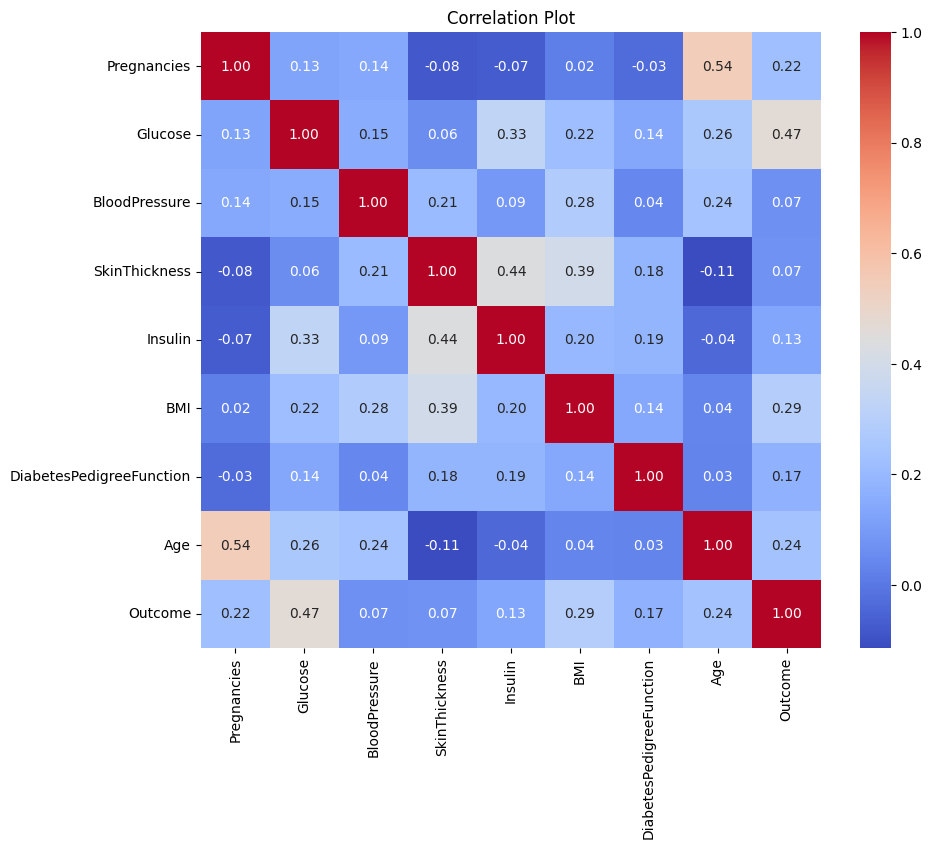

In [ ]:
correlation_matrix = df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Plot')
plt.show()

Tidak terdapat kolom-kolom yang memiliki korelasi signifikan

Outcome
0.0    500
1.0    268
Name: count, dtype: int64


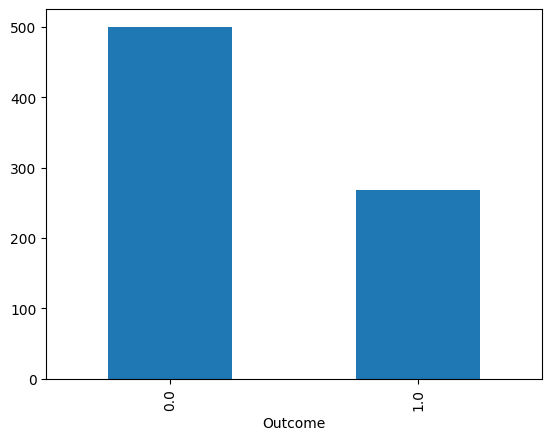

In [ ]:
color_wheel = {1: "#0392cf",
               2: "#7bc043"}
colors = df["Outcome"].map(lambda x: color_wheel.get(x + 1))
print(df.Outcome.value_counts())
p=df.Outcome.value_counts().plot(kind="bar")

Target data memiliki bias dimana hasil akhir lebih condong kepada tidak memiliki diabetes atau 0. Jumlah yang tidak memiliki diabetes hampir 2 kali lipat dari jumlah yang memiliki diabetes sehingga data menjadi imbalance.

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


Kolom berikut memiliki nilai min 0 yang tidak masuk akal, hal ini mengindikasikan missing value :
* Glucose
* BloodPressure
* SkinThickness
* Insulin
* BMI

# Pre-processing

Ubah nilai 0 menjadi NaN agar lebih mudah untuk menghitungnya

In [ ]:
df_copy = df.copy(deep = True)
df_copy[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = df_copy[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)

print(df_copy.isnull().sum())

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64


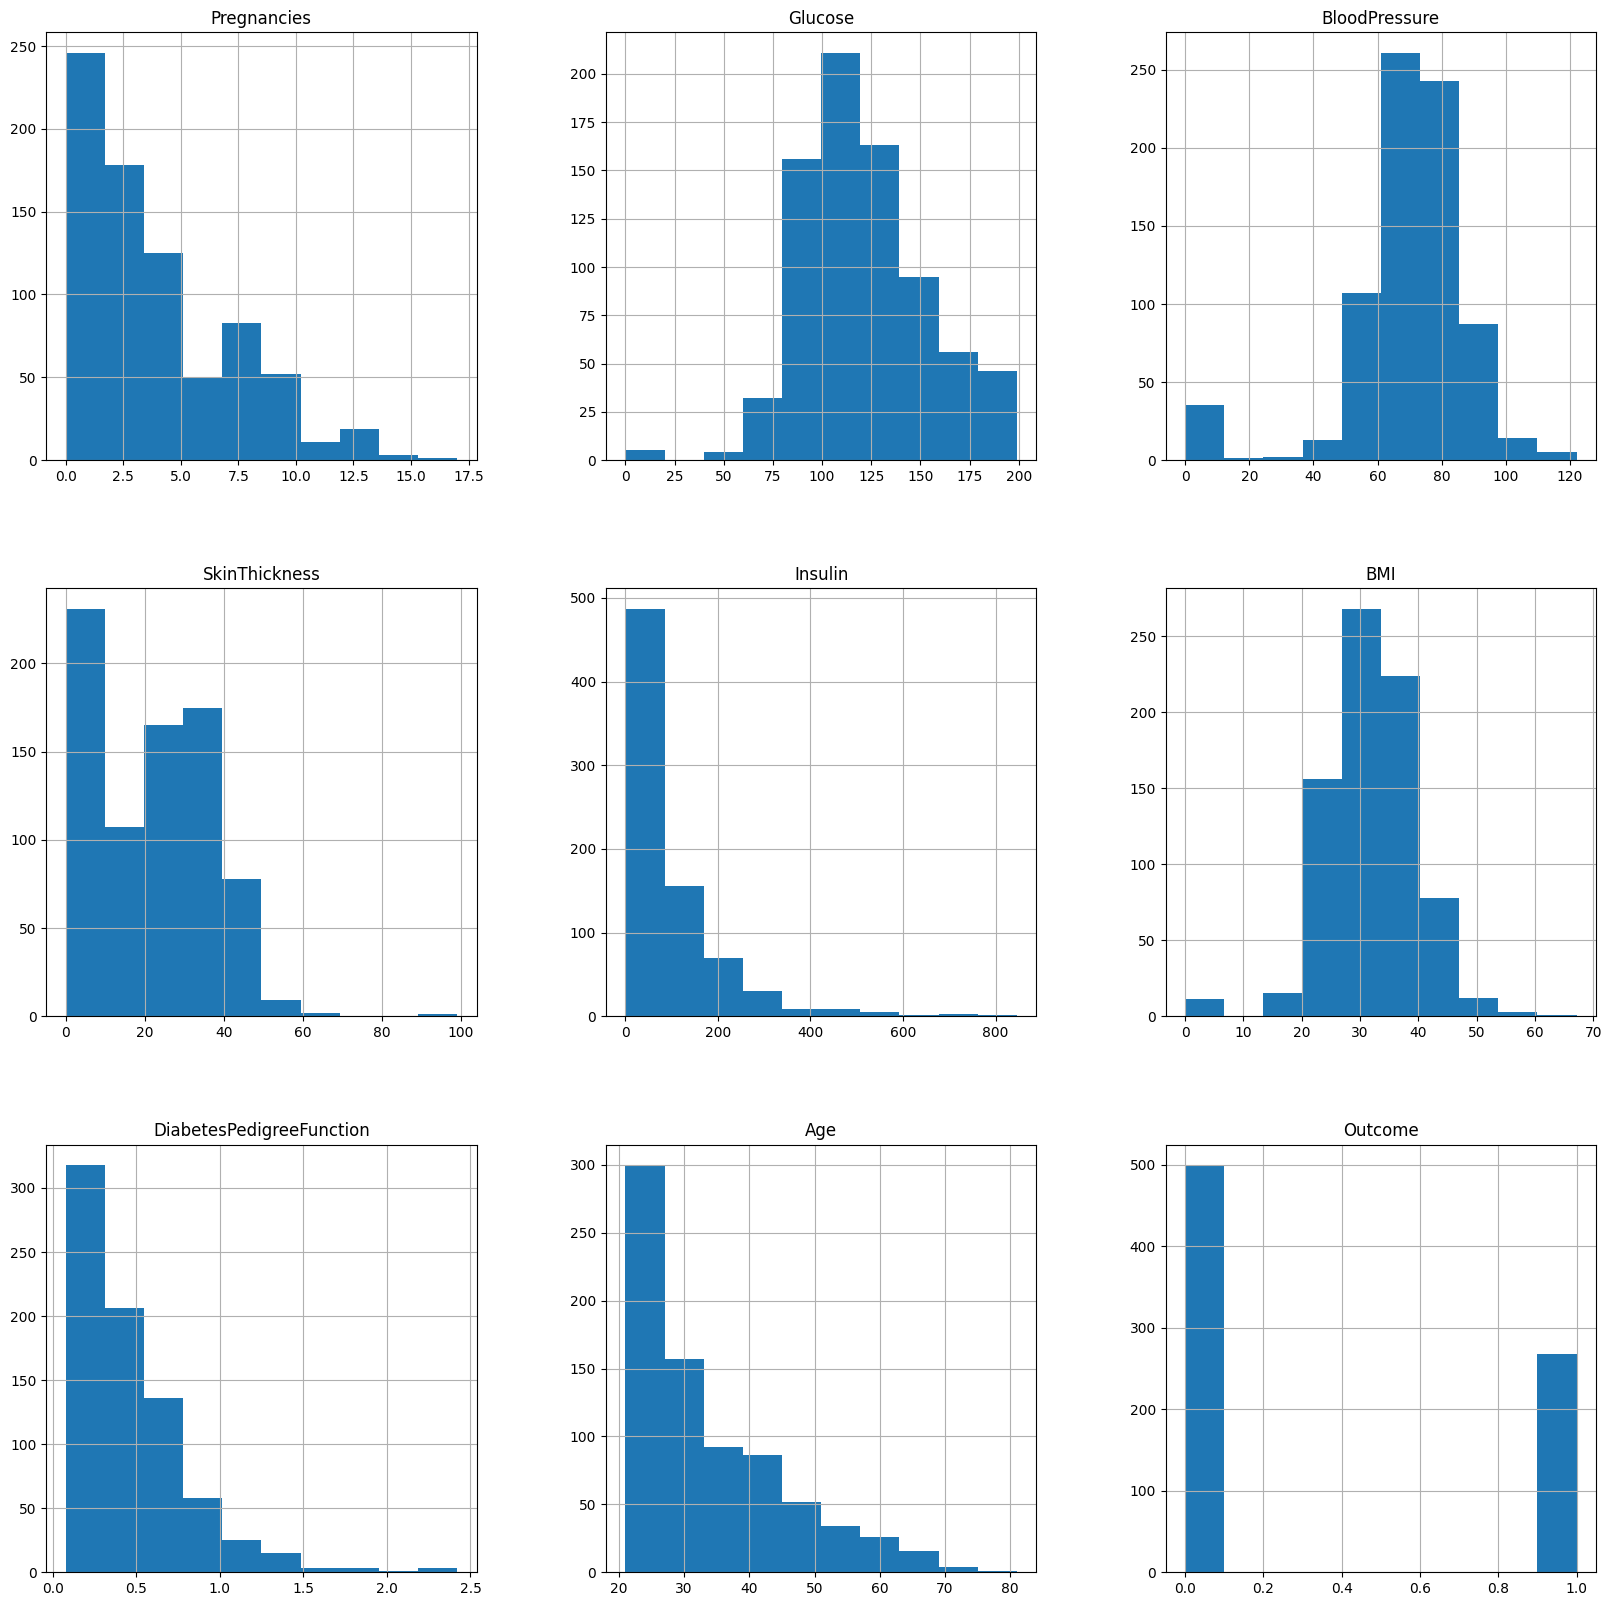

In [ ]:
p = df.hist(figsize = (20,20))

Ubah nilai NaN menjadi median atau mean berdasarkan distribusi data masing-masing. Data yang memiliki kecondongan ke kiri atau kanan nilai meannya akan lebih terpengaruh oleh outlier, oleh karena itu lebih baik untuk menggunakan median pada kolom tersebut.

*   Glucose - distribusi normal
*   BloodPressure - distribusi normal
*   SkinThickness - distribusi condong
*   Insulin - distribusi condong
*   BMI - distribusi condong



In [ ]:
df_copy['Glucose'].fillna(df_copy['Glucose'].mean(), inplace = True)
df_copy['BloodPressure'].fillna(df_copy['BloodPressure'].mean(), inplace = True)
df_copy['SkinThickness'].fillna(df_copy['SkinThickness'].median(), inplace = True)
df_copy['Insulin'].fillna(df_copy['Insulin'].median(), inplace = True)
df_copy['BMI'].fillna(df_copy['BMI'].median(), inplace = True)

# Split data

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X = df_copy.drop("Outcome", axis=1)
y = df_copy["Outcome"]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Split data menjadi 80% Training dan 20% Testing

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Scaling data menggunakan StandardScaler. TPOT menggunakan banyak model yang bekerja lebih baik dengan menggunakan data yang sudah discaling

# Model TPOT

In [ ]:
model = TPOTClassifier(verbosity = 2, max_time_mins = 20, generations = 10, population_size = 50, n_jobs=-1, random_state=42)

In [ ]:
model.fit(X_train_scaled, y_train)

Optimization Progress:   0%|          | 0/50 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: 0.7818206050912969

Generation 2 - Current best internal CV score: 0.7818206050912969

Generation 3 - Current best internal CV score: 0.7818206050912969

Generation 4 - Current best internal CV score: 0.7818206050912969

Generation 5 - Current best internal CV score: 0.7818206050912969

Generation 6 - Current best internal CV score: 0.7818206050912969

Generation 7 - Current best internal CV score: 0.7818206050912969

Generation 8 - Current best internal CV score: 0.7818206050912969

Generation 9 - Current best internal CV score: 0.7818206050912969

Generation 10 - Current best internal CV score: 0.7834199653471945

Best pipeline: ExtraTreesClassifier(input_matrix, bootstrap=False, criterion=entropy, max_features=0.7500000000000001, min_samples_leaf=3, min_samples_split=11, n_estimators=100)


TPOTClassifier(generations=10, max_time_mins=20, n_jobs=-1, population_size=50,
               random_state=42, verbosity=2)

# Evaluation

In [ ]:
model.score(X_test_scaled, y_test)

0.7597402597402597

In [ ]:
y_pred=model.predict(X_test_scaled)
print(classification_report(y_test,y_pred))
#Accuracy Score
print('accuracy is ',accuracy_score(y_pred,y_test))

              precision    recall  f1-score   support

         0.0       0.82      0.81      0.81        99
         1.0       0.66      0.67      0.67        55

    accuracy                           0.76       154
   macro avg       0.74      0.74      0.74       154
weighted avg       0.76      0.76      0.76       154

accuracy is  0.7597402597402597


Dikarenakan class data yang imbalance dimana jumlah yang tidak diabetes lebih banyak dari pada yang memiliki diabetes, maka akurasi dari classifier tidak maksimal. Meskipun telah dilakukan eksperimen dengan berbagai parameter, hasil tetap berada disekitar 75-76%